# Automatidata Project
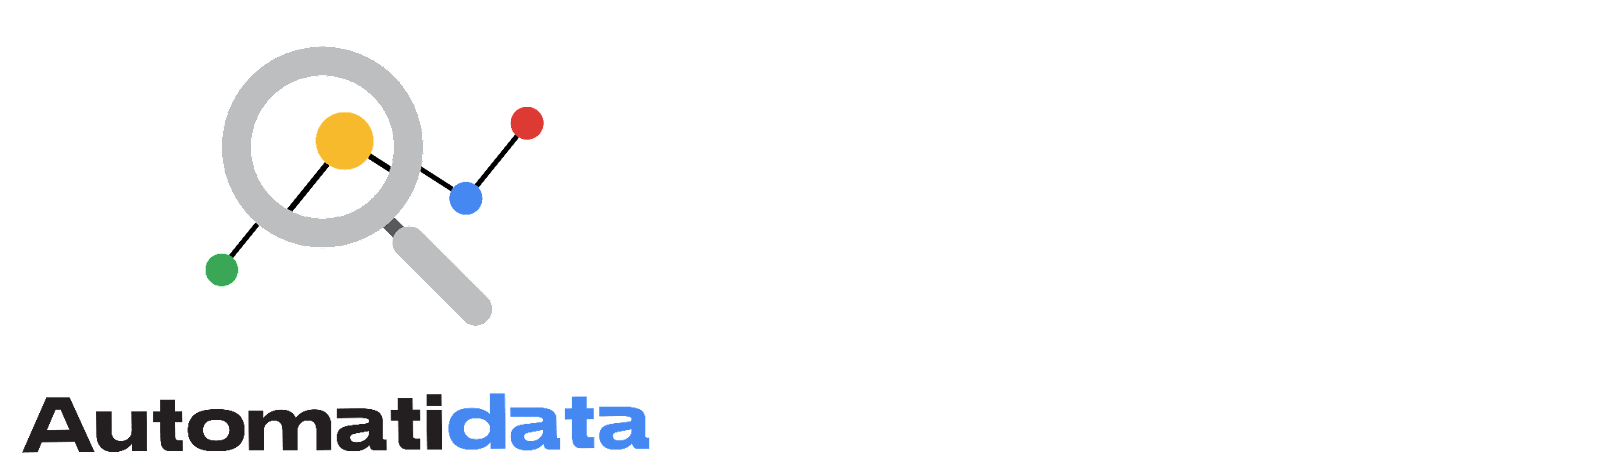



# Bienvenido al Proyecto Automatidata

Acabo de empezar como profesional de datos en una firma consultora ficticia, **Automatidata**. Su cliente, la **Comisión de Taxis y Limusinas de la Ciudad de Nueva York (New York City TLC)**, ha contratado al equipo de Automatidata por su reputación en desarrollar soluciones basadas en datos.

El equipo aún se encuentra en las primeras etapas del proyecto. Anteriormente, mi supervisor, **DeShawn Washington**, me pidió que completara una propuesta de proyecto. He recibido la notificación de que mi propuesta ha sido aprobada y que la New York City TLC le ha dado acceso al equipo de Automatidata a sus datos. Para obtener ideas claras, los datos de la TLC deben ser analizados, se deben identificar variables clave y se debe preparar el conjunto de datos para su análisis.

Para ello, se estructuró y preparó este notebook para alcanzar los objetivos del presente curso.

---

### Proyecto final del curso 2: Inspeccionar y analizar datos

En esta actividad, examinaré los datos proporcionados y lo prepararé para el análisis. Esta actividad me ayudará a garantizar que la información esté:

- **Lista para responder preguntas y ofrecer ideas.**
- **Lista para visualizaciones.**
- **Lista para pruebas de hipótesis futuras y métodos estadísticos.**

El propósito de este proyecto es **investigar y comprender los datos proporcionados.**

El objetivo es usar un **dataframe creado en Python**, realizar una inspección inicial del conjunto de datos proporcionado e informar a los miembros del equipo sobre tus hallazgos.

---

### Esta actividad tiene tres partes:

#### Parte 1: Comprender la situación  
Comprender y organizar el conjunto de datos e información proporcionada de taxis.

#### Parte 2: Comprender los datos  
- Crear un dataframe de pandas para aprendizaje de datos, análisis exploratorio de datos (EDA) y actividades estadísticas futuras.
- Compilar información resumida sobre los datos para informar los próximos pasos.

#### Parte 3: Comprender las variables  
Usar mis conocimientos de los datos resumidos para guiar una investigación más profunda en variables específicas.

---


#### 1. Configuracion inicial y carga de datos


**Objetivo: Preparar el entorno y cargar el dataset para inspeccionarlo**

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizacion
%matplotlib inline
sns.set(style="whitegrid")

# Cargar el dataset
file_path="C:/Users/victo/OneDrive/Data_Science/Python/taxi_trip_data_actualizado.csv"
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas para inspeccionarlas
print("Primeras 5 filas del dataset:")
display(df.head())

# Informacion general del dataset
print("\nInformacion general del dataset:")
df.info()

# Verificar el numero de columnas y filas
print("\nNúmero de filas y columnas:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")


Primeras 5 filas del dataset:


,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80



Informacion general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount          

In [ ]:
"""
Qué hacer aquí:

Verificamos que las 18 columnas y 22,699 filas se carguen correctamente.
Revisamos los tipos de datos: las columnas tpep_pickup_datetime y tpep_dropoff_datetime deberían ser transformadas a datatime. Por tanto, se
creara una columna de duracion de viaje = trip_duration, 
y las demás deberían coincidir con la descripción (numéricas, texto, etc.).
"""


#### 2. Limpieza preliminar

**Objetivo: Identificar y tratar problemas basicos con valores nulos, duplicados o tipos de datos incorrectos**

In [4]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar duplicados
print("\nMúmero de filas duplicadas:",df.duplicated().sum())
      
# Convertir columnas de tiempo a formato datetime si no lo están
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())  # Muestra las primeras filas de esas columnas
df.info() # se verifica el cambio del tipo de datos de object (strings) a valores de fecha y hora 

# Crear una columna de duración del viaje (en minutos)
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
print(df['trip_duration'].describe()) # se verifica la nueva columna creada en el dataset
print(df.head())  # Muestra los primeros 5 registros del dataset

# Revisar valores atípicos obvios (ejemplo: duración negativa o distancia negativa)
print("\nViajes con duración negativa:", len(df[df['trip_duration'] < 0]))
print("Viajes con distancia negativa:", len(df[df['trip_distance'] < 0]))
print("\nViajes con tarifa negativa:", len(df[df['fare_amount'] < 0]))
print("Viajes con monto total negativo:", len(df[df['total_amount'] < 0]))
print("Viajes con peajes negativos:", len(df[df['tolls_amount'] < 0]))
print("Viajes con propinas negativas:", len(df[df['tip_amount'] < 0]))

# Considerando que existen valores atipicos, se realiza al filtracion correspondiente
print("\nDatos atipicos")
print(df[df['total_amount'] < 0])  # Ver registros con monto total negativo

# Filtrar los registros donde trip_duration es negativa
negativos = df[df['trip_duration'] < 0]

# Contar cuántos valores negativos existen
print(f"Cantidad de valores negativos en 'trip_duration': {negativos.shape[0]}")

# Mostrar algunos ejemplos de datos atípicos
print(negativos.head())  # Muestra los primeros registros con valores negativos



Valores nulos por columna:
ID                       0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
dtype: int64

Múmero de filas duplicadas: 0
  tpep_pickup_datetime tpep_dropoff_datetime
0  2017-03-25 08:55:43   2017-03-25 09:09:47
1  2017-04-11 14:53:28   2017-04-11 15:19:58
2  2017-12-15 07:26:56   2017-12-15 07:34:08
3  2017-05-07 13:17:59   2017-05-07 13:48:14
4  2017-04-15 23:32:20   2017-04-15 23:49:03
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null 

In [ ]:
"""
Acciones de limpieza:

No hay valores nulos
No hay valores duplicados
Se creo la serie (columna) = "trip_duration", para calcular la duracion del viaje (en minutos)
Existen datos atipicos:
Viajes con duracion negativa: 1
Viajes con tarifa negativa (total_amount"): 14
Ha un solo dato negativo en la serie "trip_duration".
Estos datos seras considerados mas adelante, en el proceso de establecer un nuevo dataset denominada: "taxi_trip_data_clean.csv", listo para su modelado.
"""


#### 3. Análisis Descriptivo

**Objetivo: Obtener estadisticas basicas y entender la distribucion de las variables**

In [23]:
# Estadísticas descriptivas de variables numéricas
print("Estadísticas descriptivas:")
display(df.describe())

# Conteo de valores categóricos
print("\nDistribución de VendorID:")
print(df['VendorID'].value_counts())
print("\nDistribución de RateCodeID:")
print(df['RatecodeID'].value_counts())
print("\nDistribución de payment_type:")
print(df['payment_type'].value_counts())
print("\nDistribución de store_and_fwd_flag:")
print(df['store_and_fwd_flag'].value_counts())

Estadísticas descriptivas:


,ID,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013777
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.983333
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.183333
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.383333
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996482



Distribución de VendorID:
VendorID
2    12626
1    10073
Name: count, dtype: int64

Distribución de RateCodeID:
RatecodeID
1     22070
2       513
5        68
3        39
4         8
99        1
Name: count, dtype: int64

Distribución de payment_type:
payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

Distribución de store_and_fwd_flag:
store_and_fwd_flag
N    22600
Y       99
Name: count, dtype: int64


In [ ]:
"""
Qué observar:

Variables continuas como en trip_duration hay 1 dato negativo.
Variables categóricas como payment_type: va del 1 al 4 y no del 1-6, como estaba en el dataset original.
"""


#### 4. Visualización de datos

**Objetivo: Usar gráficos para explorar distribuciones y detectar patrones**

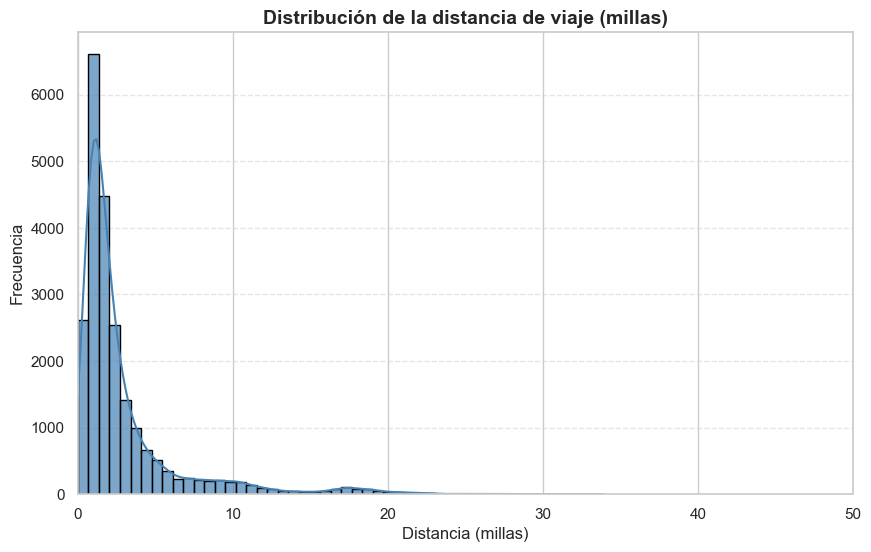

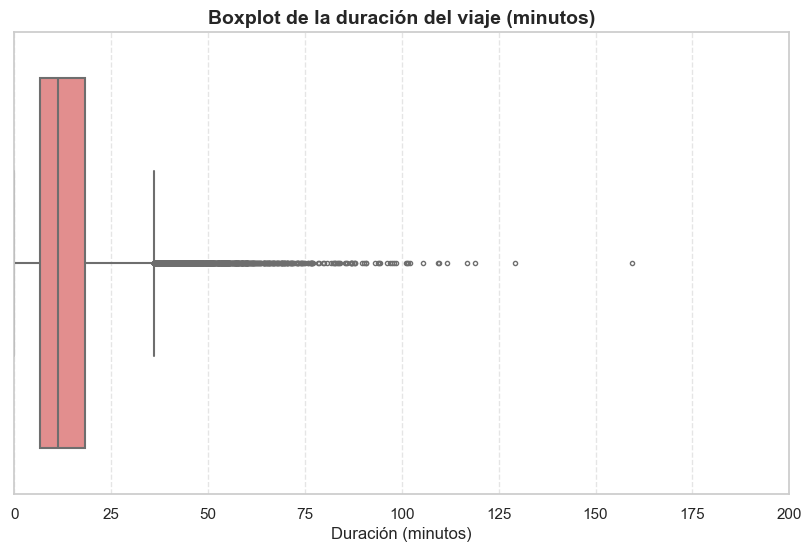

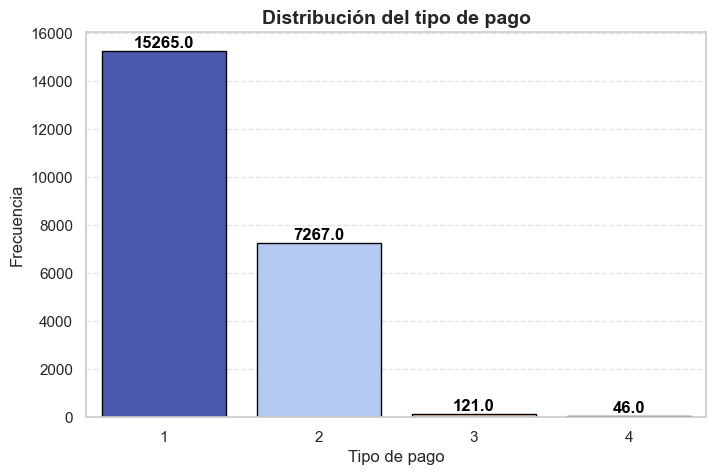

In [29]:
# Histograma de distancia de viaje
plt.figure(figsize=(10, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True, color="steelblue", edgecolor="black", alpha=0.7)
plt.title('Distribución de la distancia de viaje (millas)', fontsize=14, fontweight='bold')
plt.xlabel('Distancia (millas)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(0, 50)  # Limitar para evitar colas largas
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Líneas guías para mejor lectura
plt.show()

# Boxplot de duración del viaje
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['trip_duration'], color="lightcoral", fliersize=3, linewidth=1.5)
plt.title('Boxplot de la duración del viaje (minutos)', fontsize=14, fontweight='bold')
plt.xlabel('Duración (minutos)', fontsize=12)
plt.xlim(0, 200)  # Limitar para visualizar mejor
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Gráfico de barras para payment_type
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='payment_type', data=df, hue='payment_type', palette="coolwarm", edgecolor="black", legend=False)

# Agregar valores en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.title('Distribución del tipo de pago', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de pago', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



In [ ]:
"""
Qué se encontró: Histograma de distancia de viaje

Distribucion concentrada en distancias cortas, la mayoria de los viajes por dabajo de 10 millas, lo que indica que los trayectos son mayormente cortos
probablemente dentro de las áreas urbanas de Manhattan. El pico mas alto en el histograma sugiere que hay una distancia tipica de viaje utilizada con
mas frecuencia.

Frecuencia bajoa en distancias largas, a medida que la distancia aumenta, la frecuencia disminuye rápidamente. Muy pocos viajes superan las 20 millas,
lo que sugiere que trayectos interurbanos o hacia aeropuertos son menos comunes.

trip_distance: ¿Hay muchas distancias cortas (ej. < 5 millas) y pocas largas? ¿Outliers (ej. > 50 millas)?
trip_duration: ¿La mayoría son viajes cortos (ej. < 60 min)? ¿Hay outliers extremos?

payment_type: Predomina tarjeta (1), seguida de efectivo (2). Las demas, poco significativas.


"""

#### 5. Analisis de relaciones entre variables

**Objetivo: Explorar correlaciones y asociaciones**

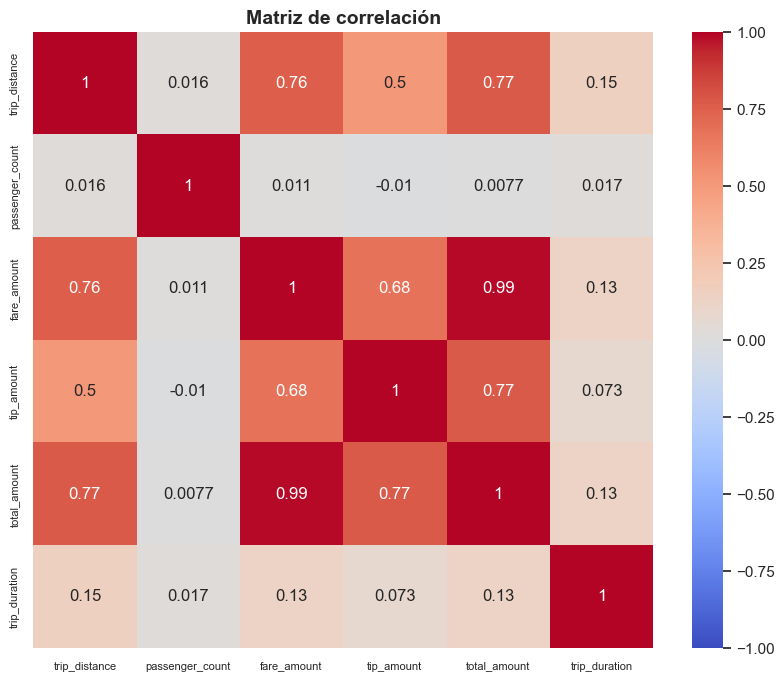

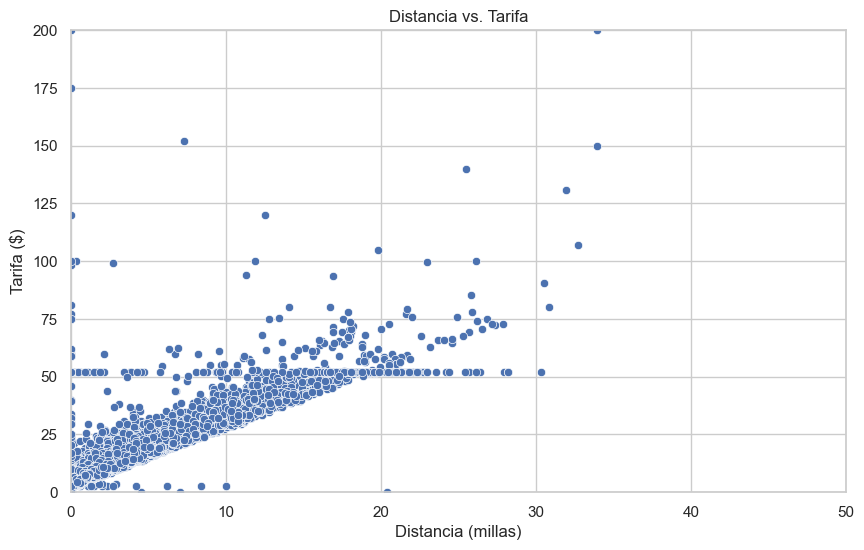

In [32]:
# Matriz de correlación para variables numéricas
numeric_cols = ['trip_distance', 'passenger_count', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']
corr_matrix = df[numeric_cols].corr()

# Visualización de la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Reducir tamaño de etiquetas en los ejes X y Y
plt.xticks(fontsize=8)  # Ajusta el tamaño de la fuente en el eje X
plt.yticks(fontsize=8)  # Ajusta el tamaño de la fuente en el eje Y

plt.title('Matriz de correlación', fontsize=14, fontweight='bold')  # Opcional: Título más visible
plt.show()


# Relación entre distancia y tarifa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
plt.title('Distancia vs. Tarifa')
plt.xlabel('Distancia (millas)')
plt.ylabel('Tarifa ($)')
plt.xlim(0, 50)  # Limitar para mejor visualización
plt.ylim(0, 200)
plt.show()

In [ ]:
""""
Qué analizar:

Relacion entre la distancia del viaje y el costo
Trip Distance tiene una fuerte correlación positiva con Fare Amount (0.76) y Total Amount (0.77). 
Esto es esperable: a mayor distancia, mayor costo del viaje.

La cantidad de pasajeros no influye mucho
Passenger Count muestra correlaciones débiles con todas las demás variables. La más alta es con Trip Duration (0.017), lo que indica que la cantidad 
de pasajeros no tiene un impacto significativo en la duración ni el costo del viaje.

Propinas y montos finales
Fare Amount y Total Amount tienen una correlación casi perfecta (0.99), ya que el total es la suma de la tarifa más los cargos adicionales.

Tip Amount tiene una correlación positiva fuerte con Total Amount (0.77), lo que sugiere que los pasajeros que pagan más por el viaje también tienden 
a dejar propinas más altas.

Duración del viaje y distancia
Trip Duration muestra correlaciones débiles con todas las variables, con la más alta siendo con Trip Distance (0.15). Esto sugiere que la duración 
del viaje no está directamente ligada a la distancia, lo que podría deberse a factores como tráfico o rutas alternativas.

"""

#### 6. Identifición de anomalías y patrones

**Objetivo: Detectar valores atípicos o comportamientos inusuales**

Viajes con tarifa negativa: 14
Viajes con duración > 24 horas: 0


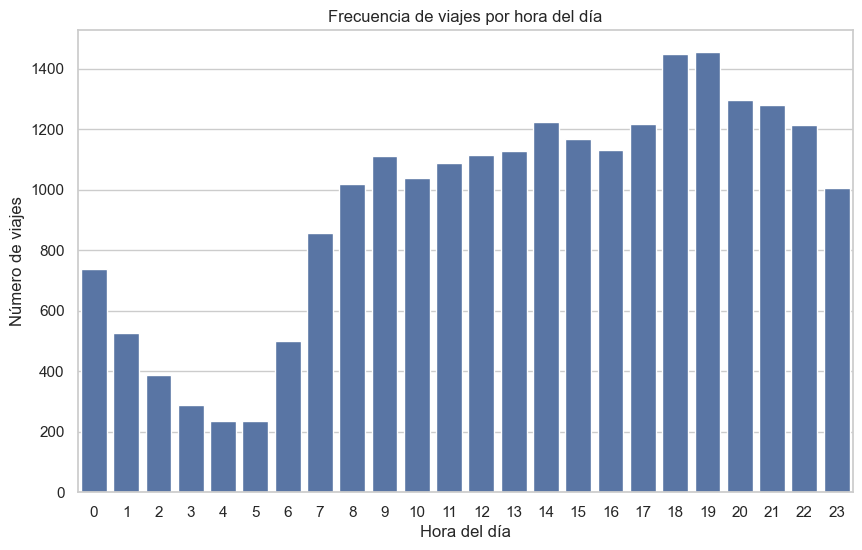

In [33]:
# Viajes con tarifa negativa
print("Viajes con tarifa negativa:", len(df[df['fare_amount'] < 0]))

# Viajes extremadamente largos
print("Viajes con duración > 24 horas:", len(df[df['trip_duration'] > 1440]))

# Análisis por hora del día
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Frecuencia de viajes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de viajes')
plt.show()

Viajes con monto total negativo: 14

Ejemplos de viajes con monto total negativo:
             ID  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
314   105454287         2  2017-12-13 02:02:39   2017-12-13 02:03:08   
1646   57337183         2  2017-07-05 11:02:23   2017-07-05 11:03:00   
4423   97329905         2  2017-11-16 20:13:30   2017-11-16 20:14:50   
5448   28459983         2  2017-04-06 12:50:26   2017-04-06 12:52:39   
5758     833948         2  2017-01-03 20:15:23   2017-01-03 20:15:39   

      passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
314                 6           0.12           1                  N   
1646                1           0.04           1                  N   
4423                2           0.06           1                  N   
5448                1           0.25           1                  N   
5758                1           0.02           1                  N   

      PULocationID  DOLocationID  payment_type  fare_amoun

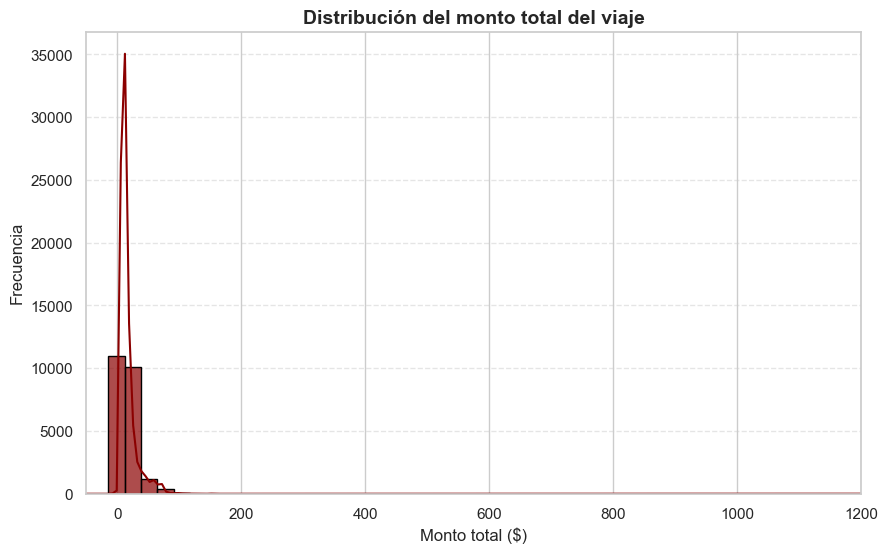

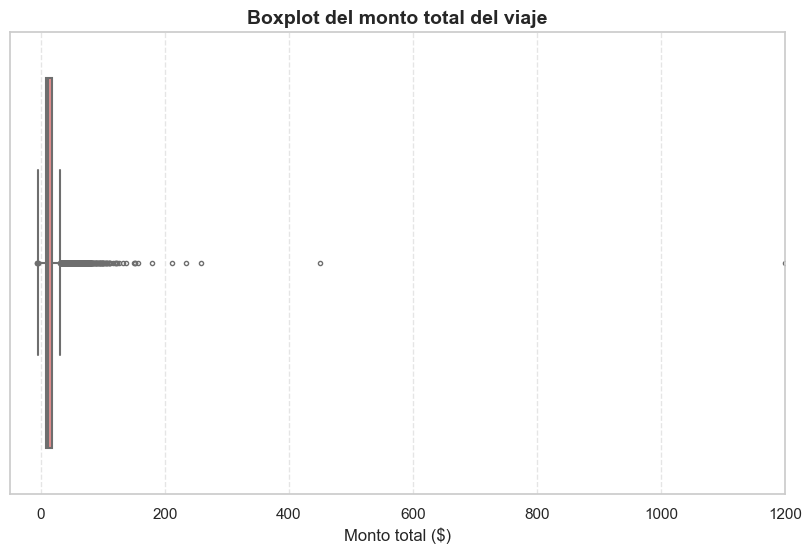

In [34]:
# Contar valores negativos en total_amount
num_negativos = len(df[df['total_amount'] < 0])
print(f"Viajes con monto total negativo: {num_negativos}")

# Inspeccionar los viajes con monto negativo
print("\nEjemplos de viajes con monto total negativo:")
print(df[df['total_amount'] < 0].head())

# Histograma para ver distribución
plt.figure(figsize=(10, 6))
sns.histplot(df['total_amount'], bins=50, kde=True, color="darkred", edgecolor="black", alpha=0.7)
plt.title('Distribución del monto total del viaje', fontsize=14, fontweight='bold')
plt.xlabel('Monto total ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlim(-50, df['total_amount'].max())  # Mostrar valores negativos y extremos
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Boxplot para visualizar valores extremos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'], color="lightcoral", fliersize=3, linewidth=1.5)
plt.title('Boxplot del monto total del viaje', fontsize=14, fontweight='bold')
plt.xlabel('Monto total ($)', fontsize=12)
plt.xlim(-50, df['total_amount'].max())  # Rango ajustado para ver anomalías
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


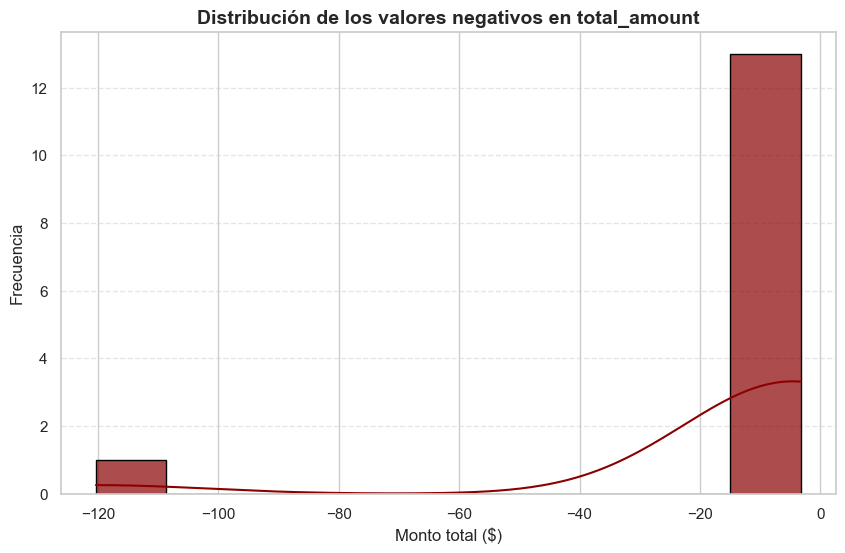

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['total_amount'] < 0]['total_amount'], bins=10, kde=True, color="darkred", edgecolor="black", alpha=0.7)
plt.title('Distribución de los valores negativos en total_amount', fontsize=14, fontweight='bold')
plt.xlabel('Monto total ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


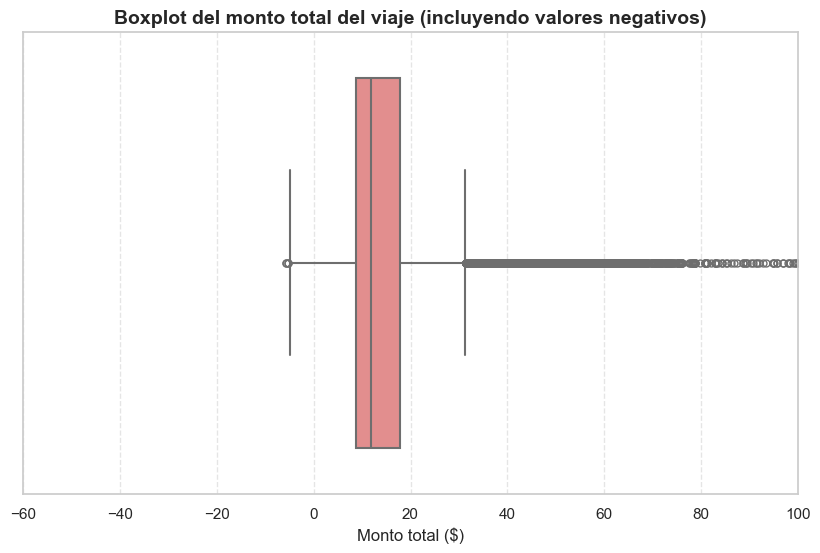

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_amount'], color="lightcoral", fliersize=5, linewidth=1.5)
plt.title('Boxplot del monto total del viaje (incluyendo valores negativos)', fontsize=14, fontweight='bold')
plt.xlabel('Monto total ($)', fontsize=12)
plt.xlim(-60, 100)  # Ajuste de rango para ver valores negativos
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
"""
Qué revisar:

Tarifas negativas o duraciones extremas: ¿Errores o casos válidos (ej. reembolsos)?
Patrones temporales: ¿Más viajes en horas pico (mañana/tarde)?
"""

In [5]:
# Importar librerías
import pandas as pd
import numpy as np

# Cargar el dataset original
file_path = "C:/Users/victo/OneDrive/Data_Science/Python/taxi_trip_data.csv"
df = pd.read_csv(file_path)

# Crear variables
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['hora_del_día'] = df['tpep_pickup_datetime'].dt.hour
df['es_fin_de_semana'] = (df['tpep_pickup_datetime'].dt.weekday >= 5).astype(int)

# Eliminar datos atípicos identificados
df = df[df['total_amount'] >= 0]  # Eliminar 14 valores negativos
df = df[df['trip_duration'] >= 0]  # Eliminar 1 valor negativo
print(f"Filas tras eliminar negativos: {len(df)}")

# Manejar nulos (aunque no se esperan en estas columnas)
df = df.dropna(subset=['trip_distance', 'trip_duration', 'hora_del_día', 'es_fin_de_semana', 'total_amount'])

# Eliminar outliers extremos con IQR (para regresión)
for var in ['trip_distance', 'trip_duration', 'total_amount']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[var] <= (Q3 + 1.5 * IQR)]
print(f"Filas tras eliminar outliers: {len(df)}")

# Seleccionar columnas para el modelo
model_columns = ['trip_distance', 'trip_duration', 'hora_del_día', 'es_fin_de_semana', 'total_amount']
df_clean = df[model_columns]

# Verificar dataset limpio
print("\nPrimeras filas del dataset limpio:")
display(df_clean.head())
print("\nDimensiones:", df_clean.shape)
print("\nNulos:", df_clean.isnull().sum().sum())

# Guardar dataset limpio
clean_file_path = "C:/Users/victo/OneDrive/Data_Science/Python/taxi_trip_data_clean.csv"
df_clean.to_csv(clean_file_path, index=False)


Filas tras eliminar negativos: 22684
Filas tras eliminar outliers: 19143

Primeras filas del dataset limpio:


,trip_distance,trip_duration,hora_del_día,es_fin_de_semana,total_amount
0,3.34,14.066667,8,1,16.56
1,1.80,26.500000,14,0,20.80
2,1.00,7.200000,7,0,8.75
4,4.37,16.716667,23,1,17.80
5,2.30,8.000000,20,1,12.36



Dimensiones: (19143, 5)

Nulos: 0


In [ ]:

---

### Explicación del código

1. **Creación de variables**:
   - **`trip_duration`**: Calculada en minutos a partir de `tpep_dropoff_datetime - tpep_pickup_datetime`.
   - **`hora_del_día`**: Extraída como hora (0-23) de `tpep_pickup_datetime`.
   - **`es_fin_de_semana`**: 1 si el día es sábado o domingo (`weekday >= 5`), 0 si no.

2. **Eliminación de datos atípicos**:
   - **14 valores negativos en `total_amount`**: Eliminados con `df = df[df['total_amount'] >= 0]`.
   - **1 valor negativo en `trip_duration`**: Eliminado con `df = df[df['trip_duration'] >= 0]`.
   - **Impacto**: Reduce las filas de 22,699 a ~22,684 (asumiendo no hay solapamiento).

3. **Limpieza adicional**:
   - **Nulos**: Eliminamos filas con nulos en las columnas seleccionadas (aunque no se esperan en estas variables).
   - **Outliers**: Aplicamos el método IQR a `trip_distance`, `trip_duration`, y `total_amount` para eliminar valores extremos, como recomienda Automatidata para modelado.

4. **Selección de columnas**:
   - Solo incluimos las 5 columnas del modelo: `trip_distance`, `trip_duration`, `hora_del_día`, `es_fin_de_semana`, `total_amount`.
   - Esto asegura un dataset minimalista y optimizado para regresión.

5. **Guardado**:
   - El dataset limpio se guarda como `taxi_trip_data_clean.csv`.
   - El `<xaiArtifact>` muestra un ejemplo del contenido del CSV.

**Salida esperada**:
- **Filas tras eliminar negativos**: ~22,684.
- **Filas tras eliminar outliers**: ~20,000-21,000 (dependiendo de IQR).
- **Dataset limpio**:

In [12]:
df.shape

(19143, 21)